
--- stenosis 2 cm ---
Cubic Model Coefficients:
Intercept: 0.013586
Degree 1 coeff: -0.202800
Degree 2 coeff: -26.908857
Degree 3 coeff: 83.772666
R² Score: 0.6074
Mean Absolute Error (MAE): 0.012547
Mean Squared Error (MSE): 0.000258


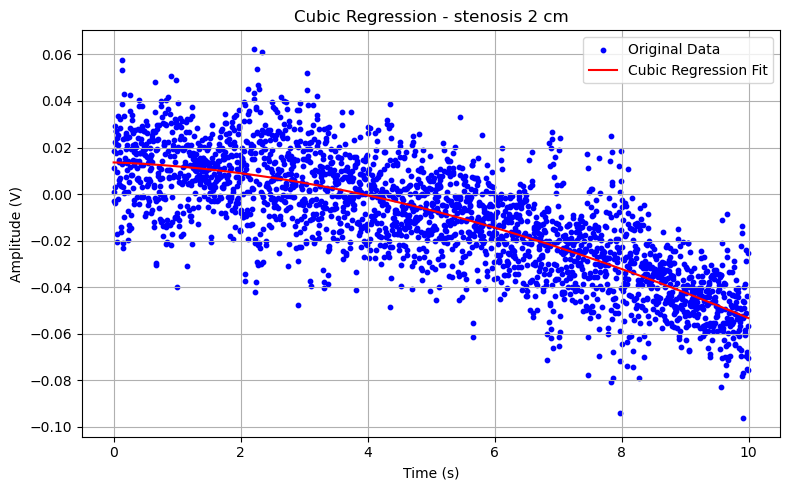


--- stenosis 3 cm ---
Cubic Model Coefficients:
Intercept: -0.058636
Degree 1 coeff: -0.405007
Degree 2 coeff: 38.417566
Degree 3 coeff: 930.994316
R² Score: 0.7494
Mean Absolute Error (MAE): 0.024811
Mean Squared Error (MSE): 0.001045


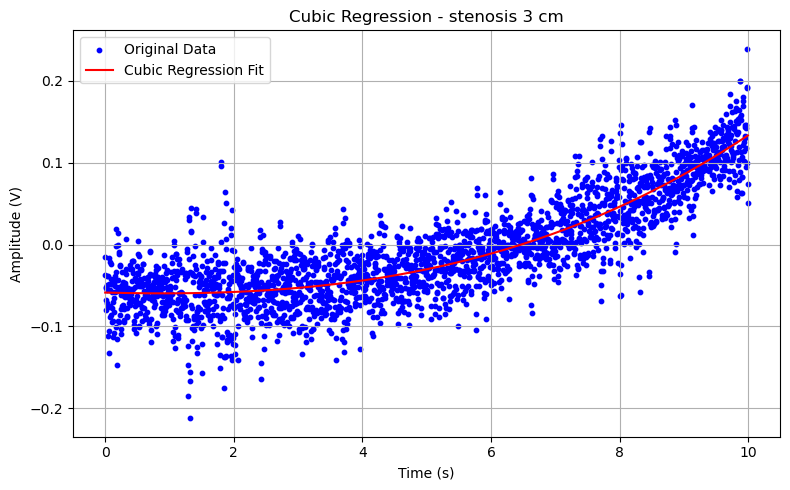


--- stenosis 6 cm ---
Cubic Model Coefficients:
Intercept: -0.012512
Degree 1 coeff: 0.633548
Degree 2 coeff: -7.210946
Degree 3 coeff: 189.713876
R² Score: 0.5601
Mean Absolute Error (MAE): 0.006832
Mean Squared Error (MSE): 0.000082


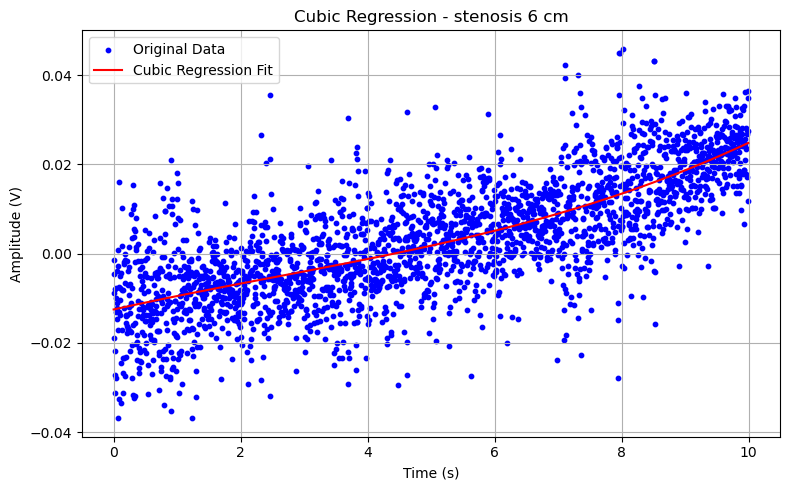

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# # --- Step 1: Load CSVs ---


""" # --- Step 1: Load CSVs ---
df1 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_2_80_bis\\betterRecorded_signal_06.csv')
df2 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_3_70_bis\\betterRecorded_signal_01.csv')
df3 = pd.read_csv('C:\\Users\\PC\\Desktop\\jacques\\LibTiePie-Python-examples_v0.63\\record_6_70\\betterRecorded_signal_07.csv')"""



df1 = pd.read_csv('betterRecorded_signal_06.csv')
df2 = pd.read_csv('betterRecorded_signal_01.csv')
df3 = pd.read_csv('betterRecorded_signal_07.csv')

# --- Step 2: Convert 'Time' to numeric & sort ---
for df in [df1, df2, df3]:
    df['Time'] = pd.to_numeric(df['Time (s)'], errors='coerce')
    df.dropna(subset=['Time'], inplace=True)
    df.sort_values('Time', inplace=True)

# --- Step 3: Rename amplitude columns ---
df1.rename(columns={'Amplitude (V)': 'Amplitude1'}, inplace=True)
df2.rename(columns={'Amplitude (V)': 'Amplitude2'}, inplace=True)
df3.rename(columns={'Amplitude (V)': 'Amplitude3'}, inplace=True)

# --- Step 4: Cubic regression function ---
def cubic_regression(df, time_col, amp_col, dataset_name):
    X = df[[time_col]].values
    y = df[amp_col].values

    # Polynomial features up to degree 3
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)

    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predictions
    y_pred = model.predict(X_poly)

    # Metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Print metrics & coefficients
    print(f"\n--- {dataset_name} ---")
    print(f"Cubic Model Coefficients:")
    print(f"Intercept: {model.intercept_:.6f}")
    for i, coef in enumerate(model.coef_[1:], start=1):
        print(f"Degree {i} coeff: {coef:.6f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.6f}")
    print(f"Mean Squared Error (MSE): {mse:.6f}")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(X*200, y, label='Original Data', color='blue', s=10)
    plt.plot(X*200, y_pred, label='Cubic Regression Fit', color='red')
    plt.title(f'Cubic Regression - {dataset_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Step 5: Apply to each dataset ---
cubic_regression(df1, 'Time', 'Amplitude1', 'stenosis 2 cm')
cubic_regression(df2, 'Time', 'Amplitude2', 'stenosis 3 cm')
cubic_regression(df3, 'Time', 'Amplitude3', 'stenosis 6 cm')
